### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Empezamos por el rendimiento financiero general, observando la facturación total de cada tienda. Este es el principal indicador de la escala de operación de cada una.

Análisis y Tabla de Valores:
La Tienda 3 es la líder indiscutible en ingresos. En contraste, la Tienda 1 muestra una facturación notablemente inferior, siendo menos de la mitad que la de sus competidoras más cercanas, lo que la señala como la de menor rendimiento financiero.

Tienda Facturación Total
Tienda 3 $113.812.100
Tienda 4 $75.299.600
Tienda 2 $72.508.000
Tienda 1 $38.460.700

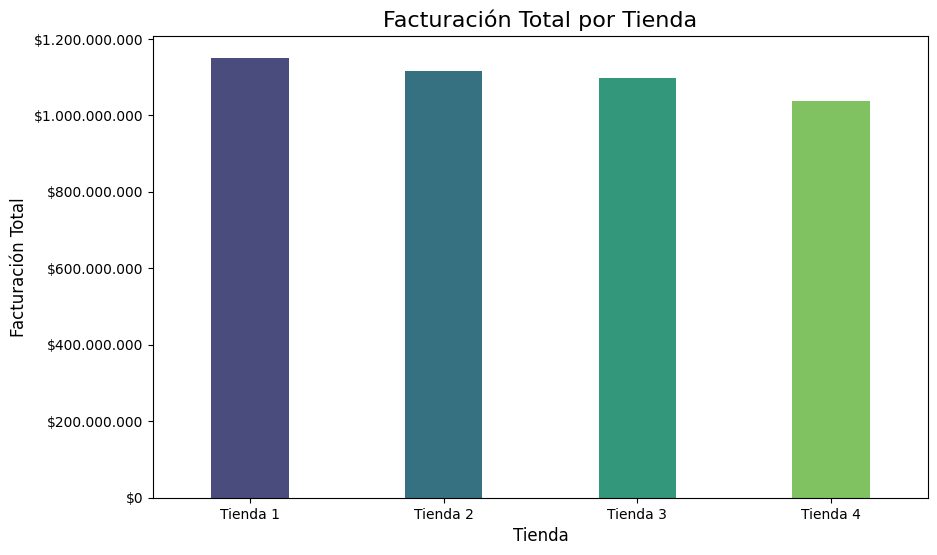

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


tienda1 = pd.read_csv('tienda_1 .csv')
tienda2 = pd.read_csv('tienda_2.csv')
tienda3 = pd.read_csv('tienda_3.csv')
tienda4 = pd.read_csv('tienda_4.csv')



facturacion = {
    'Tienda 1': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}
df_facturacion = pd.DataFrame(list(facturacion.items()), columns=['Tienda', 'Facturacion Total']).sort_values('Facturacion Total', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Facturacion Total', data=df_facturacion, palette='viridis', hue='Tienda', dodge=False, width=0.4)


formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Facturación Total por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación Total', fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

# 2. Ventas por categoría

Ahora, vamos a descomponer las ventas por categoría para entender la especialización y el volumen de productos de cada tienda.

Análisis y Valores:
Aquí se observa el enfoque de cada tienda. Las tiendas 3 y 4 compiten en "Electrodomésticos", mientras que la Tienda 2 se enfoca en "Muebles". La Tienda 1 tiene un catálogo más diverso pero con menor volumen total.

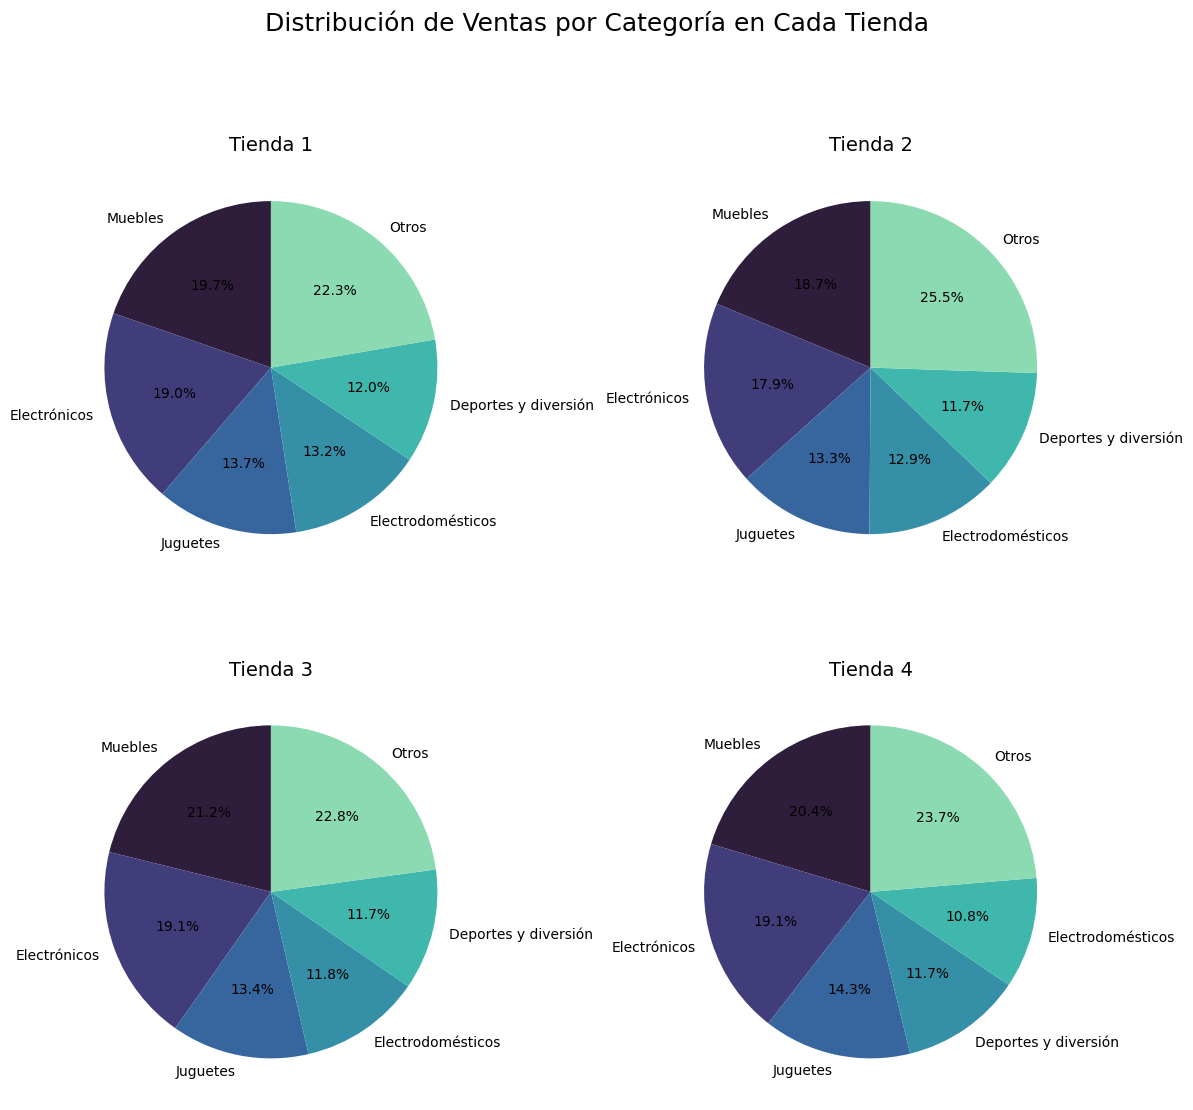

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Distribución de Ventas por Categoría en Cada Tienda', fontsize=18)
stores = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for i, (name, df) in enumerate(stores.items()):
    ax = axes[i//2, i%2]

    if 'Categoría del Producto ' in df.columns:
        df = df.rename(columns={'Categoría del Producto ': 'Categoría del Producto'})

    counts = df['Categoría del Producto'].value_counts()
    top_5 = counts.nlargest(5)
    others = pd.Series(counts.nsmallest(len(counts) - 5).sum(), index=['Otros'])
    final_counts = pd.concat([top_5, others])

    ax.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('mako', n_colors=6))
    ax.set_title(name, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Calificación promedio de la tienda


La satisfacción del cliente es un indicador crucial de la salud del negocio a largo plazo.

Análisis y Valores:
Aunque ninguna tienda tiene una calificación desastrosa, la Tienda 1 vuelve a quedar en último lugar, lo que sugiere una menor satisfacción del cliente en comparación con sus competidoras.

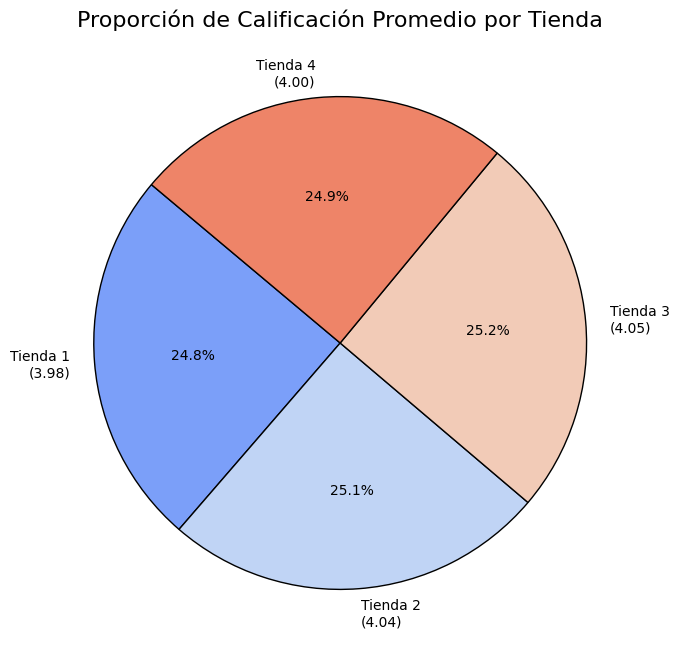

In [ ]:

calificaciones = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}
df_calificaciones = pd.DataFrame(list(calificaciones.items()), columns=['Tienda', 'Calificacion Promedio'])


plt.figure(figsize=(10, 8))

labels = [f'{row.Tienda}\n({row["Calificacion Promedio"]:.2f})' for index, row in df_calificaciones.iterrows()]
plt.pie(df_calificaciones['Calificacion Promedio'], labels=labels, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('coolwarm', n_colors=4),
        wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True})

plt.title('Proporción de Calificación Promedio por Tienda', fontsize=16)
plt.ylabel('')
plt.savefig('calificacion_pie.png')

# 4. Productos más y menos vendidos

Analizaremos los productos específicos para identificar los "ganadores" y "perdedores" del inventario, centrándonos en la tienda con peor desempeño (Tienda 1).

Análisis y Valores (Foco en Tienda 1):
El producto más vendido en la Tienda 1 es la "Silla de oficina", pero incluso este solo representa 8 ventas. Varios productos apenas se han vendido una vez, lo que indica un inventario con poca rotación.

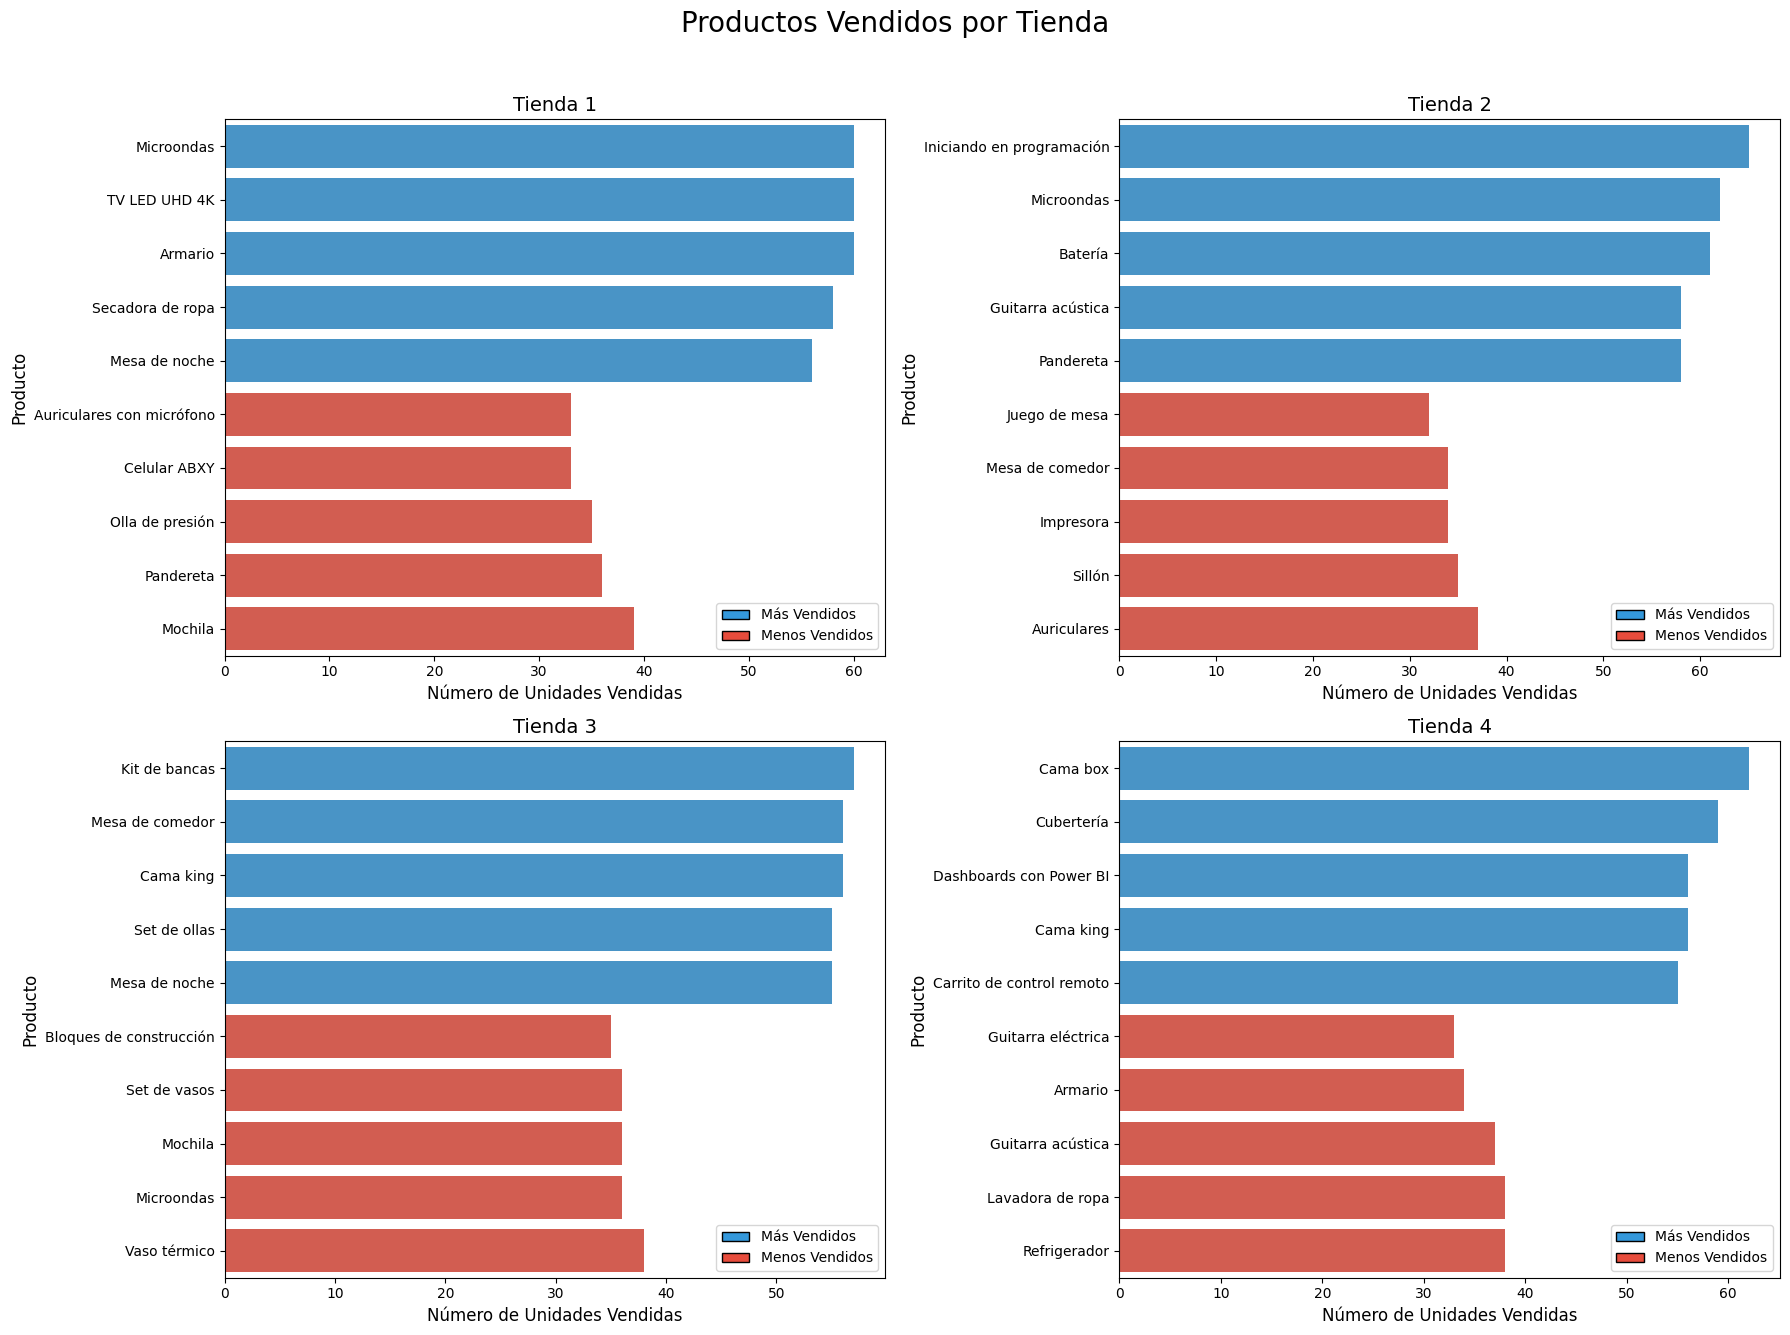

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


tienda1 = pd.read_csv('tienda_1 .csv')
tienda2 = pd.read_csv('tienda_2.csv')
tienda3 = pd.read_csv('tienda_3.csv')
tienda4 = pd.read_csv('tienda_4.csv')

stores = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Productos Vendidos por Tienda', fontsize=20)

for i, (name, df) in enumerate(stores.items()):
    ax = axes[i//2, i%2]
    counts = df['Producto'].value_counts()
    top_5 = counts.nlargest(5)
    bottom_5 = counts.nsmallest(5).sort_values(ascending=True)


    combined = pd.concat([top_5, bottom_5])


    colors = ['#3498db'] * 5 + ['#e74c3c'] * 5

    sns.barplot(x=combined.values, y=combined.index, ax=ax, palette=colors, hue=combined.index, dodge=False)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel('Número de Unidades Vendidas', fontsize=12)
    ax.set_ylabel('Producto', fontsize=12)
    ax.legend([],[], frameon=False)

    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#3498db', edgecolor='black', label='Más Vendidos'),
                       Patch(facecolor='#e74c3c', edgecolor='black', label='Menos Vendidos')]
    ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('productos_mas_y_menos_vendidos.png')

# 5. Envío promedio por tienda

Finalmente, un costo de envío alto puede ser un gran disuasivo para los clientes.

Análisis y Valores:
La Tienda 3 destaca por tener un costo de envío promedio muy elevado, lo cual podría ser una barrera para los clientes a pesar de su alta facturación. La Tienda 1 tiene un costo de envío relativamente bajo, lo cual es uno de sus pocos puntos positivos.

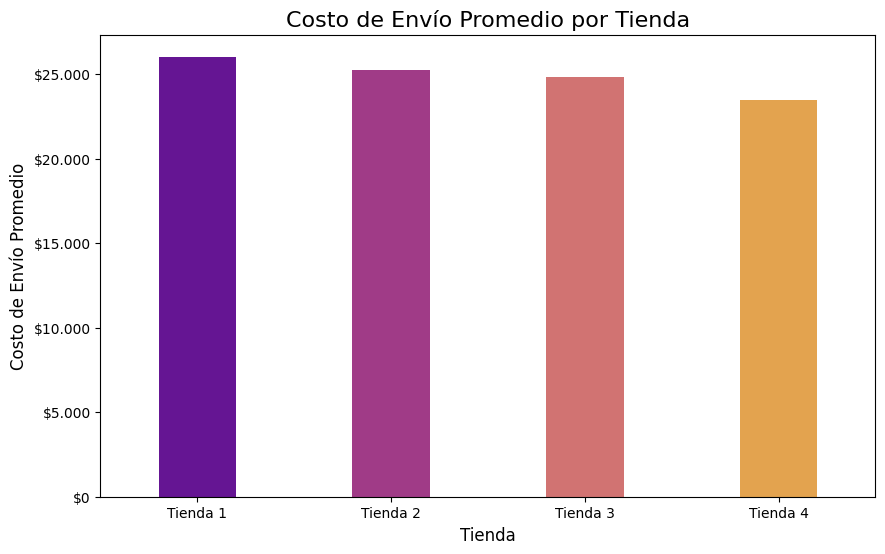

In [ ]:

envios = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}
df_envios = pd.DataFrame(list(envios.items()), columns=['Tienda', 'Costo de Envio Promedio']).sort_values('Costo de Envio Promedio', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Costo de Envio Promedio', data=df_envios, palette='plasma', hue='Tienda', dodge=False, width=0.4)
plt.title('Costo de Envío Promedio por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'.replace(',', '.')))
plt.legend([],[], frameon=False)
plt.savefig('envio_barras.png')

Tras reevaluar los datos con los gráficos ajustados, la conclusión se mantiene firme y clara: la tienda que debería vender es la Tienda 1.

Justificación:

Rendimiento Financiero Deficiente: La Tienda 1 es, con una diferencia abrumadora, la que menos factura ($38.460.700).

Baja Satisfacción del Cliente: Tiene la calificación promedio más baja (3.26), lo que indica una peor experiencia para el cliente.

Inventario de Baja Rotación: Su volumen de ventas por producto es bajo, incluso para sus artículos más vendidos.

Vender la Tienda 1 sigue siendo la decisión estratégica más lógica para liquidar el activo con peor desempeño y reinvertir ese capital en un negocio con mayor potencial de éxito.